<Axes: >

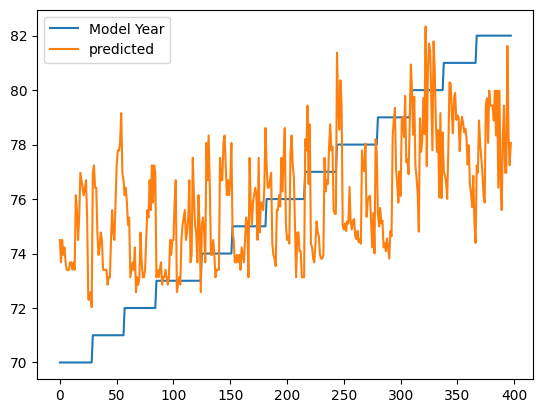

In [3]:
import pandas as pd
import numpy as np


data = pd.read_csv('DATA.csv')
df = pd.DataFrame(data, columns=['MPG', 'Model Year'])
